In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import linear_model
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

%matplotlib inline 

In [31]:
#load dataframe
raw_df = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls', 
                         skiprows=4, skipfooter=3)

raw_columns = {'Murder and\nnonnegligent\nmanslaughter': 'Murder','Rape\n(legacy\ndefinition)2': 'Rape',
           'Aggravated\nassault': 'Aggravated_assualt', 'Property\ncrime': 'Property_crime',
           'Larceny-\ntheft': 'Larceny_theft', 'Motor\nvehicle\ntheft': 'Vehicle_theft',
           'Violent\ncrime': 'Violent_crime','Rape\n(revised\ndefinition)1':'Rape_1', 'Arson3' : 'Arson'}  

raw_df = raw_df.rename(raw_columns,axis=1)
crime_df = raw_df.copy()
crime_df.drop(['Rape_1','Arson'],axis=1,inplace=True)
crime_df.head()

,City,Population,Violent_crime,Murder,Rape,Robbery,Aggravated_assualt,Property_crime,Burglary,Larceny_theft,Vehicle_theft
0,Adams Village,1861,0,0,0,0,0,12,2,10,0
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1
2,Akron Village,2846,3,0,0,0,3,16,1,15,0
3,Albany,97956,791,8,30,227,526,4090,705,3243,142
4,Albion Village,6388,23,0,3,4,16,223,53,165,5


In [32]:
crime_df.describe()

,Population,Violent_crime,Murder,Rape,Robbery,Aggravated_assualt,Property_crime,Burglary,Larceny_theft,Vehicle_theft
count,3.480000e+02,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,4.003763e+04,201.594828,1.566092,5.864943,72.902299,121.261494,792.606322,119.683908,637.017241,35.905172
std,4.500374e+05,2815.268504,18.303673,60.425452,1031.032873,1706.131730,7659.724746,924.948789,6346.054451,403.423826
min,5.260000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.003000e+03,2.000000,0.000000,0.000000,0.000000,1.000000,40.500000,6.000000,31.000000,0.000000
50%,7.233500e+03,6.000000,0.000000,0.000000,1.000000,4.000000,112.500000,17.500000,94.000000,2.000000
75%,1.842750e+04,22.000000,0.000000,2.000000,5.000000,14.000000,341.000000,51.250000,287.250000,7.000000
max,8.396126e+06,52384.000000,335.000000,1112.000000,19170.000000,31767.000000,141971.000000,16606.000000,117931.000000,7434.000000


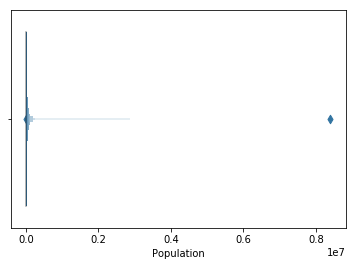

In [33]:
# let's now check population boxplot 

sns.boxenplot(crime_df.Population)
plt.show()

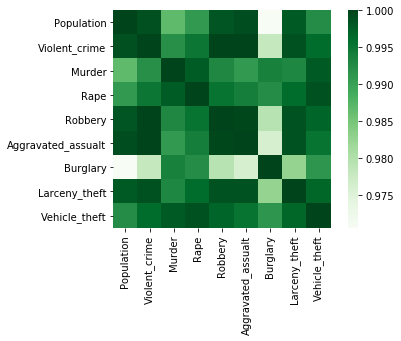

,Population,Violent_crime,Murder,Rape,Robbery,Aggravated_assualt,Burglary,Larceny_theft,Vehicle_theft
Population,1.000000,0.998854,0.986758,0.990839,0.998469,0.999134,0.970578,0.997946,0.992421
Violent_crime,0.998854,1.000000,0.992098,0.994985,0.999923,0.999942,0.978150,0.998762,0.996271
Murder,0.986758,0.992098,1.000000,0.997746,0.993104,0.990843,0.993733,0.993175,0.997992
Rape,0.990839,0.994985,0.997746,1.000000,0.995438,0.994140,0.992442,0.996260,0.998764
Robbery,0.998469,0.999923,0.993104,0.995438,1.000000,0.999742,0.979525,0.998735,0.996927
Aggravated_assualt,0.999134,0.999942,0.990843,0.994140,0.999742,1.000000,0.976288,0.998561,0.995403
Burglary,0.970578,0.978150,0.993733,0.992442,0.979525,0.976288,1.000000,0.982700,0.991464
Larceny_theft,0.997946,0.998762,0.993175,0.996260,0.998735,0.998561,0.982700,1.000000,0.996878
Vehicle_theft,0.992421,0.996271,0.997992,0.998764,0.996927,0.995403,0.991464,0.996878,1.000000


In [34]:
id_variables = crime_df.columns
id_variables = id_variables[id_variables!="Property_crime"].drop("City",1)

# create heatmap to see how the independent variables correlate with each other 
corrmat = crime_df[id_variables].corr()
sns.heatmap(corrmat, cmap = 'Greens',square=True)
plt.show()

corrmat

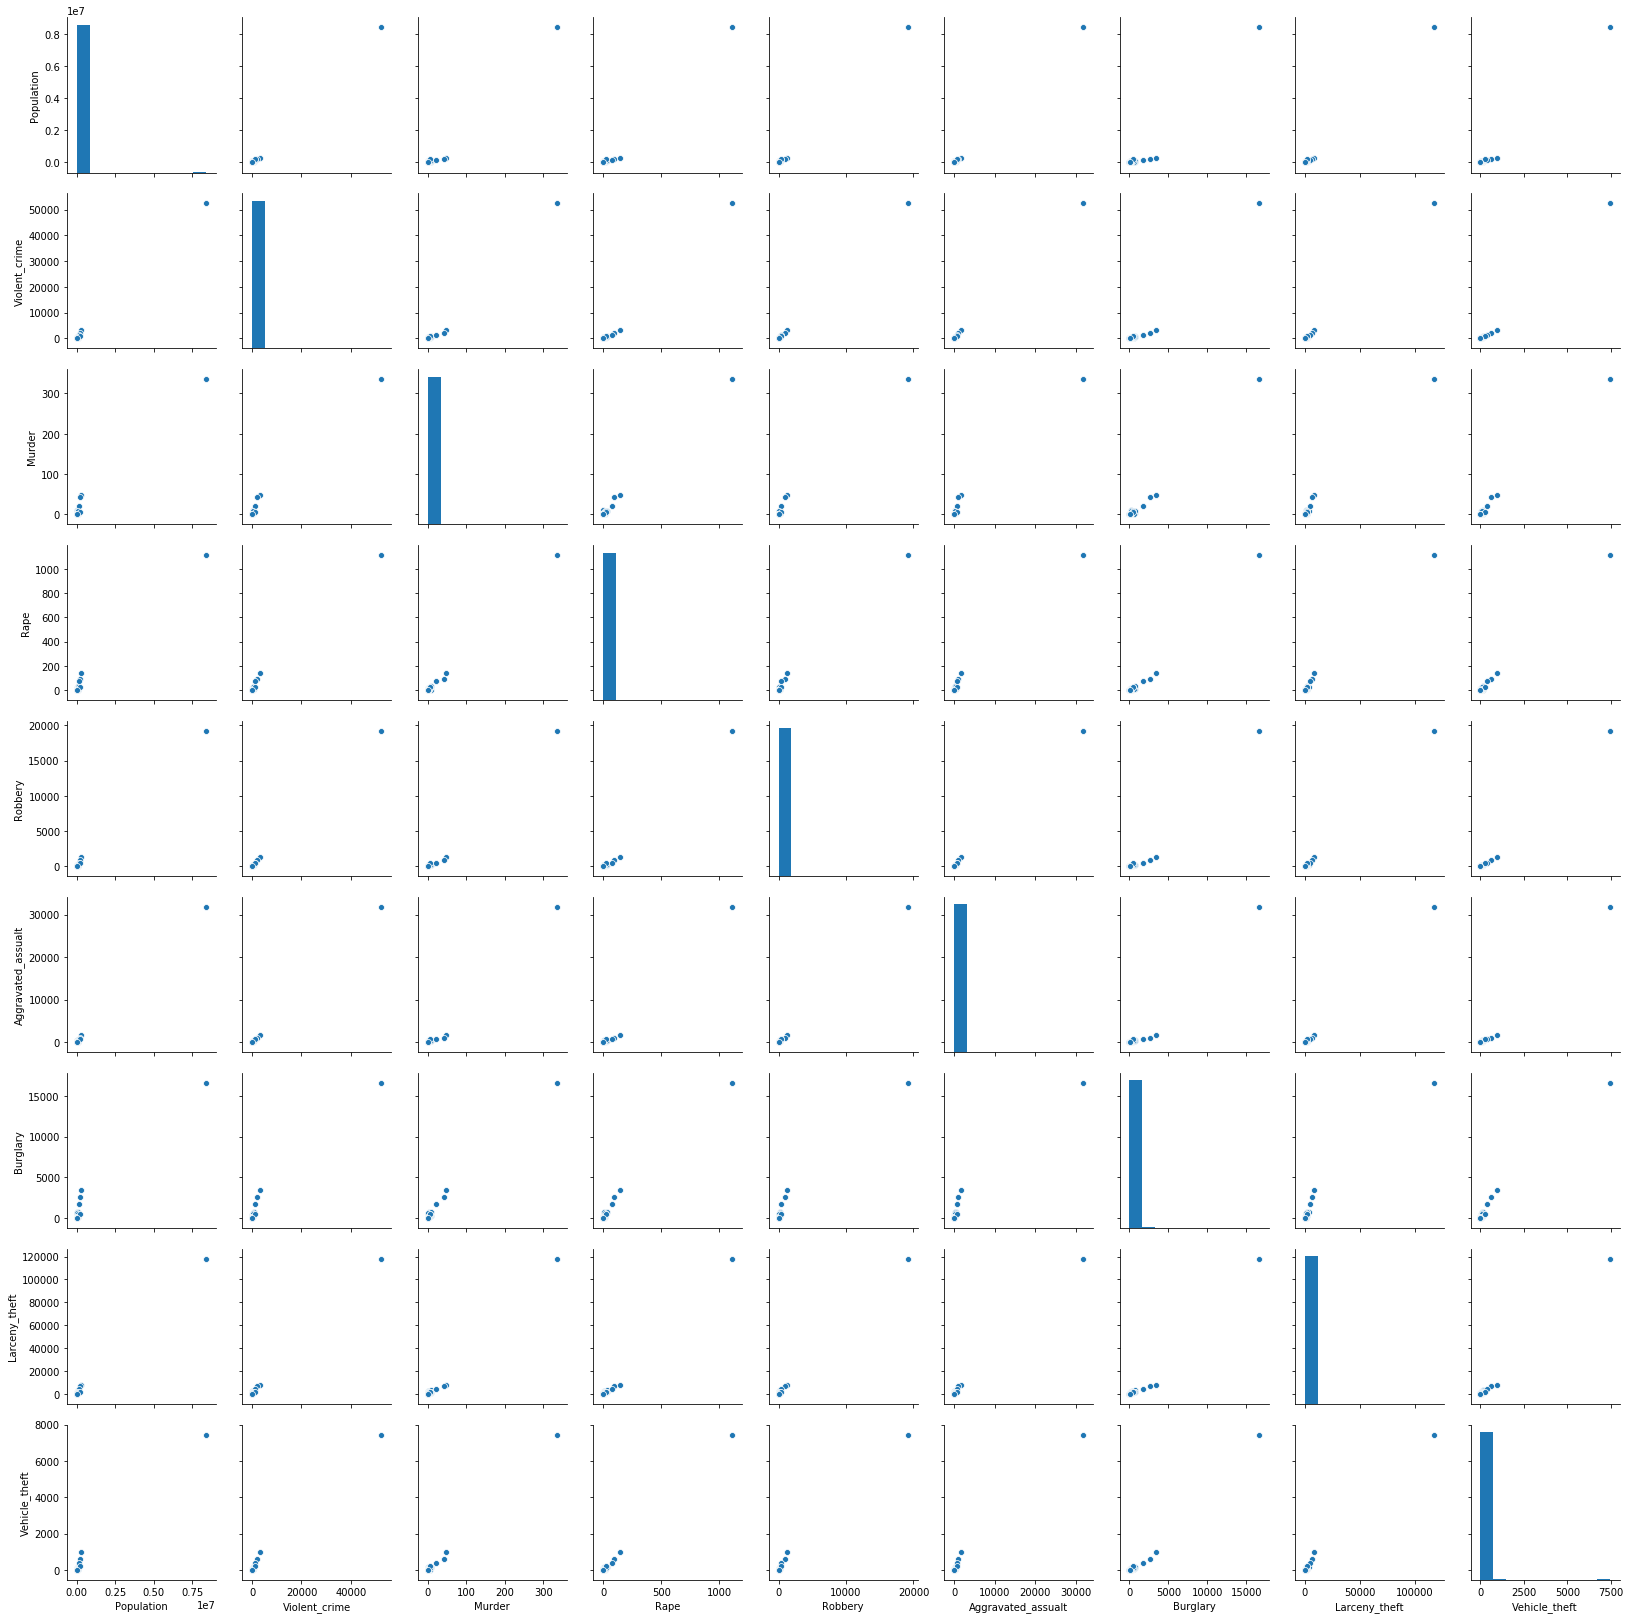

In [37]:
sns.pairplot(crime_df[id_variables])
plt.show()

# Feature Engineering 
- Review how each variable compares to the target variable 
- Remove outliers if need be (create seperate dataframes) 
- Create new features if need be in order to ensure feature variables are linear 

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


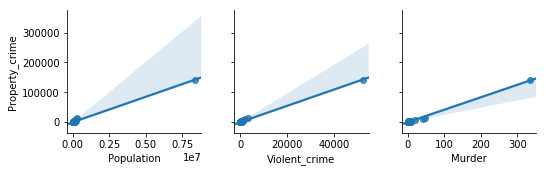

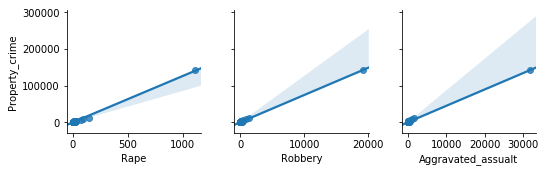

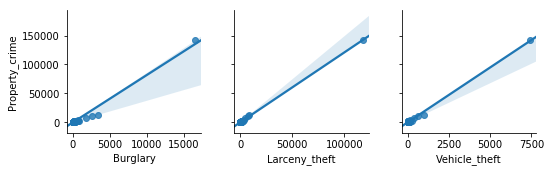

In [39]:
sns.pairplot(data=crime_df,
                  y_vars=['Property_crime'],
                  x_vars=['Population', 'Violent_crime', 'Murder'],
                  kind='reg')

plt.show()
sns.pairplot(data=crime_df,
                  y_vars=['Property_crime'],
                  x_vars=['Rape', 'Robbery','Aggravated_assualt'],
                  kind='reg')
plt.show()
sns.pairplot(data=crime_df,
                  y_vars=['Property_crime'],
                  x_vars=['Burglary', 'Larceny_theft','Vehicle_theft'],
                  kind='reg')
plt.show()

### Seperate data by population, then compare how independent variables affect target variable

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


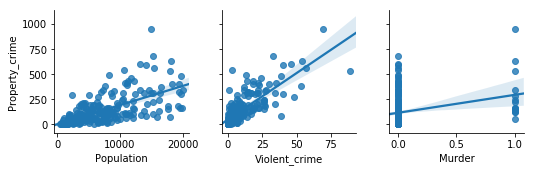

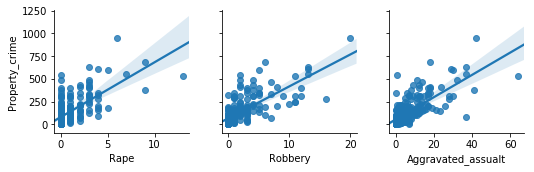

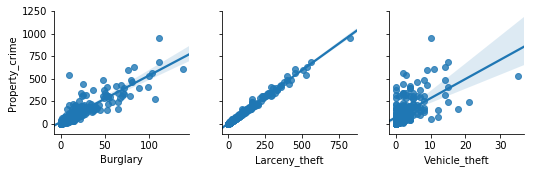

In [51]:
# less than 20,000 in population 

sns.pairplot(data=crime_df.query('20000 > Population'),
                  y_vars=['Property_crime'],
                  x_vars=['Population', 'Violent_crime', 'Murder'],
                  kind='reg',
                  )

plt.show()
sns.pairplot(data=crime_df.query('20000 > Population'),
                  y_vars=['Property_crime'],
                  x_vars=['Rape', 'Robbery','Aggravated_assualt'],
                  kind='reg')
plt.show()
sns.pairplot(data=crime_df.query('20000 > Population'),
                  y_vars=['Property_crime'],
                  x_vars=['Burglary', 'Larceny_theft','Vehicle_theft'],
                  kind='reg')
plt.show()

# Murder is categorical 
# Look at correlation of Vehicle Theft 

In [41]:
small_cities = crime_df.query('20000 > Population').copy()
large_cities = crime_df.query('20000 < Population').copy()

In [42]:
small_cities["Sqr_Pop"] = small_cities.Population**2
small_cities["Sqrt_Pop"] = small_cities.Population.apply(np.sqrt)
small_cities["Log_Pop"] = (small_cities.Population +1).apply(np.log)

large_cities["Sqr_Pop"] = large_cities.Population**2
large_cities["Sqrt_Pop"] = large_cities.Population.apply(np.sqrt)
large_cities["Log_Pop"] = (large_cities.Population +1).apply(np.log)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


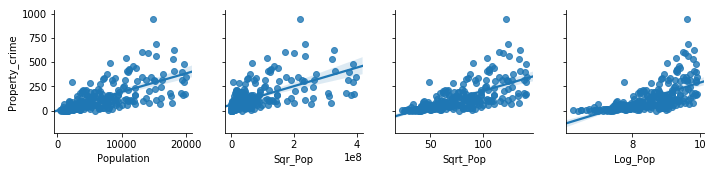

In [43]:
sns.pairplot(data=small_cities,
                  y_vars=['Property_crime'],
                  x_vars=['Population','Sqr_Pop', 'Sqrt_Pop', 'Log_Pop'],
                  kind='reg')

plt.show()

# cannot use coefficient, stricly visual 

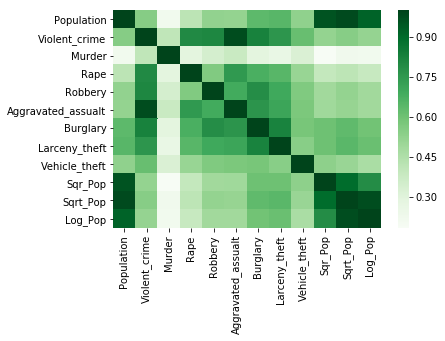

In [44]:
corrmat = small_cities.drop(['City','Property_crime'],1).corr()
sns.heatmap(corrmat,cmap="Greens")
plt.show()

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


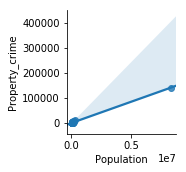

In [47]:
sns.pairplot(data=large_cities,
                  y_vars=['Property_crime'],
                  x_vars=['Population'],
                  kind='reg')

plt.show()

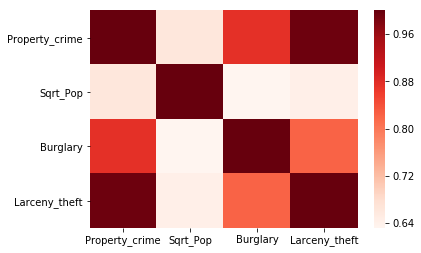

In [53]:
corrmat = small_cities[['Property_crime','Sqrt_Pop','Burglary','Larceny_theft']].corr()
sns.heatmap(corrmat,cmap="Reds")
plt.show()

### Small city linear regression model

In [55]:
X = small_cities[['Sqrt_Pop','Burglary','Larceny_theft']]
y = small_cities['Property_crime']

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [57]:
regr_small = linear_model.LinearRegression()
regr_small.fit(X_train, y_train)
regr_small.score(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


0.9994990743694311

In [58]:
regr_small.score(X_test, y_test)

0.9995354562536448

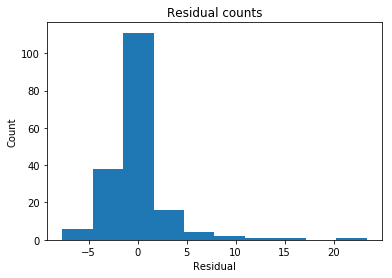

In [60]:
predicted = regr_small.predict(X_train).ravel()
actual = y_train

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

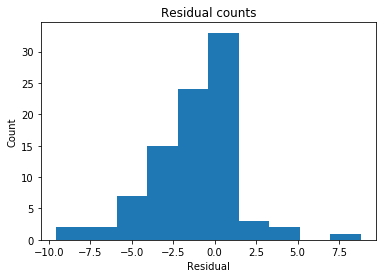

In [62]:
predicted = regr_small.predict(X_test).ravel()
actual = y_test

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

### Large city linear regression model

In [63]:
X = large_cities[['Sqrt_Pop','Burglary','Larceny_theft']]
y = large_cities['Property_crime']

regr_large = linear_model.LinearRegression()
regr_large.fit(X, y)
regr_large.score(X, y)

0.9999955387011626

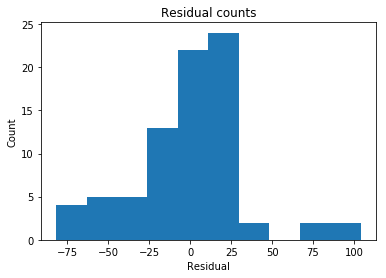

In [64]:
predicted = regr_large.predict(X).ravel()
actual = y

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

### Cross validation of small and large linear regression models

##### small linear regression model 

In [65]:
from sklearn.model_selection import cross_val_score
cross_val_score(regr_small, X_train, y_train, cv=10)

array([0.99958602, 0.99980268, 0.9994719 , 0.99801056, 0.99980573,
       0.99784012, 0.9990865 , 0.9996233 , 0.99960162, 0.99947061])

In [66]:
from sklearn.model_selection import cross_val_score
cross_val_score(regr_small, X_test, y_test, cv=4)

array([0.99973634, 0.9990585 , 0.99986687, 0.9998059 ])

##### large linear regression model 

In [67]:
from sklearn.model_selection import cross_val_score
cross_val_score(regr_large, X, y, cv=10)

array([0.999521  , 0.99878357, 0.99763   , 0.99332754, 0.99237321,
       0.99809313, 0.98988971, 0.99987263, 0.99965002, 0.99130245])

### Test statistics of small and large regression models  

In [98]:
linear_formula = 'Property_crime ~ Burglary+Sqrt_Pop+Larceny_theft'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=small_cities).fit()

In [99]:
lm.params

Intercept        0.944446
Burglary         1.092079
Sqrt_Pop        -0.037010
Larceny_theft    1.039764
dtype: float64

In [100]:
lm.pvalues

Intercept         7.529322e-01
Burglary         2.411971e-110
Sqrt_Pop          5.556404e-01
Larceny_theft    1.283727e-182
dtype: float64

In [79]:
lm.rsquared

0.9995454868134378

##### remove Sqrt_Pop

In [102]:
linear_formula = 'Property_crime ~ Burglary+Larceny_theft'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=small_cities).fit()

In [103]:
lm.params

Intercept       -0.609309
Burglary         1.089657
Larceny_theft    1.036059
dtype: float64

In [104]:
lm.pvalues

Intercept         6.703850e-01
Burglary         8.308626e-112
Larceny_theft    9.282430e-205
dtype: float64

In [105]:
lm.rsquared

0.9970721148963579

# Algorithm on Georgia Dataset 

In [91]:
raw_ga_df = pd.read_excel('table_8_offenses_known_to_law_enforcement_georgia_by_city_2013.xls', 
                         skiprows=4, skipfooter=3)
crime_ga_df = raw_ga_df.copy()
crime_ga_df.drop(['Rape\n(revised\ndefinition)1','Arson3'],axis=1,inplace=True)

columns = {'Murder and\nnonnegligent\nmanslaughter': 'Murder','Rape\n(legacy\ndefinition)2': 'Rape',
           'Aggravated\nassault': 'Aggravated_assualt', 'Property\ncrime': 'Property_crime',
           'Larceny-\ntheft': 'Larceny_theft', 'Motor\nvehicle\ntheft': 'Vehicle_theft',
           'Violent\ncrime': 'Violent_crime'}
crime_ga_df = crime_ga_df.rename(columns,axis=1)
crime_ga_df["Sqrt_Pop"] = crime_ga_df.Population.apply(np.sqrt)

small_cities = crime_ga_df.query('20000 > Population').copy()
large_cities = crime_ga_df.query('20000 < Population').copy()

crime_ga_df.head()

,City,Population,Violent_crime,Murder,Rape,Robbery,Aggravated_assualt,Property_crime,Burglary,Larceny_theft,Vehicle_theft,Sqrt_Pop
0,Abbeville,2888,3,0,0,2,1,22,3,16,3,53.740115
1,Adairsville,4686,13,0,0,1,12,52,15,31,6,68.454364
2,Adel,5240,18,0,5,5,8,189,64,121,4,72.387844
3,Adrian,656,0,0,0,0,0,2,0,2,0,25.612497
4,Alapaha,646,5,0,0,1,4,6,0,6,0,25.416530


### Small city linear regression model for Georgia 

In [106]:
X = small_cities[['Burglary','Larceny_theft']]
y = small_cities['Property_crime']

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

regr_small = linear_model.LinearRegression()
regr_small.fit(X_train, y_train)
regr_small.score(X_train, y_train)

0.9957882081507877

In [108]:
regr_small.score(X_test,y_test)

0.9992824099485234

In [109]:
X = large_cities[['Burglary','Larceny_theft']]
y = large_cities['Property_crime']

regr_large = linear_model.LinearRegression()
regr_large.fit(X, y)
regr_large.score(X, y)

0.9981955511549658

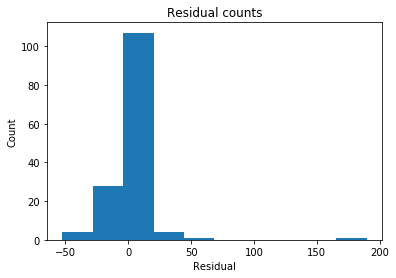

In [110]:
predicted = regr_small.predict(X_train).ravel()
actual = y_train

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

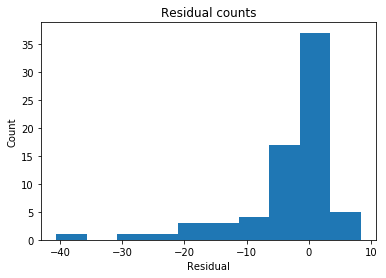

In [111]:
predicted = regr_small.predict(X_test).ravel()
actual = y_test

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()